# Uncertainty propagation using Delta and Monte Carlo methods

Uncertainty or error of a variable in general, is crucial in most engineering applications. This python class includes the two most used methods for calculating propagation of uncertainty and examples of its usages are illustrated bellow. 

## Methods description

### Delta Method

Delta method, in short, calculates the uncertainty or Standard Error squared of Mean or Variance of a function by approximation using Taylor Expansion.
So, for a scalar function $f$ with $ \mathbf{x}= \left[ x_1,x_2,\dots,x_n \right] $ vector of variables with uncertainty, the variance is

\begin{equation}
{\sigma_f}^2 = \mathbf{J} \mathbf{\Sigma^x} \mathbf{J}^{\intercal}
\end{equation}

<a href="https://www.codecogs.com/eqnedit.php?latex=\pmb{\Sigma&space;^x}=&space;\begin{bmatrix}&space;\sigma&space;_{1}^{2}&\sigma&space;_{12}&\sigma&space;_{13}&\cdots&space;\\&space;\sigma&space;_{12}&\sigma&space;_{2}^{2}&\sigma&space;_{23}&\cdots&space;\\&space;\sigma&space;_{13}&\sigma&space;_{23}&\sigma&space;_{3}^{2}&\cdots&space;\\&space;\vdots&space;&&space;\vdots&space;&&space;\vdots&space;&&space;\ddots&space;\end{bmatrix}" target="_blank"><img src="https://latex.codecogs.com/svg.latex?\pmb{\Sigma&space;^x}=&space;\begin{bmatrix}&space;\sigma&space;_{1}^{2}&\sigma&space;_{12}&\sigma&space;_{13}&\cdots&space;\\&space;\sigma&space;_{12}&\sigma&space;_{2}^{2}&\sigma&space;_{23}&\cdots&space;\\&space;\sigma&space;_{13}&\sigma&space;_{23}&\sigma&space;_{3}^{2}&\cdots&space;\\&space;\vdots&space;&&space;\vdots&space;&&space;\vdots&space;&&space;\ddots&space;\end{bmatrix}" title="\pmb{\Sigma ^x}= \begin{bmatrix} \sigma _{1}^{2}&\sigma _{12}&\sigma _{13}&\cdots \\ \sigma _{12}&\sigma _{2}^{2}&\sigma _{23}&\cdots \\ \sigma _{13}&\sigma _{23}&\sigma _{3}^{2}&\cdots \\ \vdots & \vdots & \vdots & \ddots \end{bmatrix}" /></a>

is the variance - covariance matrix of variables $\mathbf{x}$ and 


\begin{equation}
\mathbf {J} ={\begin{bmatrix}{\dfrac {\partial {f} }{\partial x_{1}}}&\cdots &{\dfrac {\partial {f} }{\partial x_{n}}}\end{bmatrix}}
\end{equation}

is the Jacobian of $f$, where $\mathbf{J} =(\nabla f)^{ \intercal }$
 is valid for scalar functions.






### Monte Carlo Method

Monte Carlo is a stochastic method. It is using probability density functions to create a population of dependent variables by sampling from the PDF and then calculates the corresponding independent variable. Finally, SEM is the standard deviation of the population of independent variables. 


## Standard Error of Mean calculated by 2 methods
Lets consider the following example.
After a hard day in the lab, we measure the values of a variable 15 times and those measurements are in the vector 

<a href="https://www.codecogs.com/eqnedit.php?latex=\pmb{x}&space;=&space;[1.47,&space;1.50,&space;1.52&space;,&space;1.55&space;,&space;1.57&space;,&space;1.60&space;,&space;1.63&space;,&space;1.65&space;,&space;1.68&space;,&space;1.70&space;,&space;1.73&space;,&space;1.75&space;,&space;1.78&space;,&space;1.80,&space;1.83]" target="_blank"><img src="https://latex.codecogs.com/svg.latex?\pmb{x}&space;=&space;[1.47,&space;1.50,&space;1.52&space;,&space;1.55&space;,&space;1.57&space;,&space;1.60&space;,&space;1.63&space;,&space;1.65&space;,&space;1.68&space;,&space;1.70&space;,&space;1.73&space;,&space;1.75&space;,&space;1.78&space;,&space;1.80,&space;1.83]" title="\pmb{x} = [1.47, 1.50, 1.52 , 1.55 , 1.57 , 1.60 , 1.63 , 1.65 , 1.68 , 1.70 , 1.73 , 1.75 , 1.78 , 1.80, 1.83]" /></a>

The objective is to calculate the mean and the standard error of the mean (SEM) of $\mathbf{x}$.

We know that to calculate the mean the below formula is applied

\begin{equation*}
\bar {x}={\frac {1}{n}}\left(\sum _{i=1}^{n}{x_{i}}\right)={\frac {x_{1}+x_{2}+\cdots +x_{n}}{n}}
\end{equation*}

Now we must calculate the Standard Error of the Mean, $\delta x$. Its know that 

\begin{equation*}
\delta x = \sigma_{\mu}={\sqrt {{\frac {1}{n(n-1)}}\sum _{i=1}^{n}\left(x_{i}-{\bar {x}}\right)^{2}}}
\end{equation*}

where n is the size of $\mathbf{x}$.
Pretty straight forward.

The above relations are applied in the following code

In [13]:
x = [1.47, 1.50, 1.52 , 1.55 , 1.57 , 1.60 , 1.63 , 1.65 , 1.68 , 1.70 , 1.73 , 1.75 , 1.78 , 1.80,  1.83]

mean = lambda x : sum(x)/len(x)

SEM = lambda x : (sum([(xi - mean(x))**2 for xi in x]) / (len(x)*(len(x)-1)))**0.5

print('x = {:.4e} +/- {:.4e}'.format(mean(x),SEM(x)))
import numpy as np
#print('{:.4e}'.format(np.std(x)/(np.sqrt(len(x)-1))))

x = 1.6507e+00 +/- 2.9495e-02


For testing that both methods work, we are going to compute $\delta x$ with both Delta and Monte Carlo methods.

### Delta method

First of all lets compute the $(\nabla f )^{\intercal}$ vector

\begin{equation*}
(\nabla f )^{\intercal}= \left[  \dfrac{\partial \bar{x}}{\partial x_1} ,\dfrac{\partial \bar{x}}{\partial x_2}, \dots , \dfrac{\partial \bar{x}}{\partial x_n}        \right]
\end{equation*}

With 
\begin{equation*}
\dfrac{\partial \bar{x}}{\partial x_i} = \dfrac{1}{n} , i \in \{ 1,2,\dots, n \}
\end{equation*}

So, 
\begin{equation*}
(\nabla f )^{\intercal} = \dfrac{1}{n} \left[  1^0 ,2^0, \dots , n^0 \right]
\end{equation*}


$x_i$ variables are uncorellated, so 

<a href="https://www.codecogs.com/eqnedit.php?latex=\pmb{\Sigma^x}&space;=&space;{1&space;\over&space;{n-1}}\sum&space;_{i=1}^{n}(\mathbf&space;{x}&space;_{i}.-\mathbf&space;{\bar&space;{x}}&space;)(\mathbf&space;{x}&space;_{i}.-\mathbf&space;{\bar&space;{x}}&space;)^{&space;{\intercal}&space;}&space;=&space;{1&space;\over&space;{n-1}}\sum&space;_{i=1}^{n}(\mathbf&space;{x}&space;_{i}.-\mathbf&space;{\bar&space;{x}}&space;)^2" target="_blank"><img src="https://latex.codecogs.com/svg.latex?\pmb{\Sigma^x}&space;=&space;{1&space;\over&space;{n-1}}\sum&space;_{i=1}^{n}(\mathbf&space;{x}&space;_{i}.-\mathbf&space;{\bar&space;{x}}&space;)(\mathbf&space;{x}&space;_{i}.-\mathbf&space;{\bar&space;{x}}&space;)^{&space;{\intercal}&space;}&space;=&space;{1&space;\over&space;{n-1}}\sum&space;_{i=1}^{n}(\mathbf&space;{x}&space;_{i}.-\mathbf&space;{\bar&space;{x}}&space;)^2" title="\pmb{\Sigma^x} = {1 \over {n-1}}\sum _{i=1}^{n}(\mathbf {x} _{i}.-\mathbf {\bar {x}} )(\mathbf {x} _{i}.-\mathbf {\bar {x}} )^{ {\intercal} } = {1 \over {n-1}}\sum _{i=1}^{n}(\mathbf {x} _{i}.-\mathbf {\bar {x}} )^2" /></a>

And finally SEM can be computed as  

<a href="https://www.codecogs.com/eqnedit.php?latex=\delta&space;\bar{x}&space;=&space;\sqrt{&space;\nabla&space;f\&space;\pmb{\Sigma^x}&space;{(\nabla&space;f&space;)}^{\intercal}&space;}" target="_blank"><img src="https://latex.codecogs.com/svg.latex?\delta&space;\bar{x}&space;=&space;\sqrt{&space;\nabla&space;f\&space;\pmb{\Sigma^x}&space;{(\nabla&space;f&space;)}^{\intercal}&space;}" title="\delta \bar{x} = \sqrt{ \nabla f\ \pmb{\Sigma^x} {(\nabla f )}^{\intercal} }" /></a>

The above relations are applied in the following code

In [14]:
##Import numpy for linear algebra and dealing with arrays 
import numpy as np

cov_matrix = lambda x : sum([(xi - mean(x))**2 for xi in x]) / ((len(x)-1))   
grad = lambda x  : (1/len(x))*np.ones(len(x))

SEM_delta = np.sqrt(grad(x).dot(cov_matrix(x)).dot(grad(x).T))

print('x = {:.4e} +/- {:.4e}'.format(mean(x),SEM_delta))

print('(SEM_real - SEM_delta_method)^2 = ', (SEM(x) - SEM_delta)**2)

x = 1.6507e+00 +/- 2.9495e-02
(SEM_real - SEM_delta_method)^2 =  0.0


### Monte Carlo method

Monte Carlo method is based is probality density functions. In order ot compute the SEM we first create a population of $\mathbf{x}$'s of size N by sampling from a multivariable gaussian distribution with mean and standard deviation equal to those of $\mathbf{x}$. Then we calculate $\bar{x_i}$ of each sampled $\mathbf{x_i}, i\in \{1,2,\dots,N \}$. The final result is the standard deviation of population of $\bar{x}$.



The above method is applied in the following code

In [15]:
## Import multivariable gaussian distribution function in order to sample x's
from scipy.stats import multivariate_normal

MC_sample_size = 1e6

sampled_x = multivariate_normal.rvs(x,cov_matrix(x),int(np.floor(MC_sample_size))).T

x_bar = mean(sampled_x)

SEM_MC = np.std(x_bar)

print('x = {:.4e} +/- {:.4e}'.format(mean(x),SEM_MC))

print('(SEM_real - SEM_MC_method)^2 = ', (SEM(x) - SEM_MC)**2)

x = 1.6507e+00 +/- 2.9481e-02
(SEM_real - SEM_MC_method)^2 =  2.1180021487460137e-10


## Illustration of uncert_prop



The uncert_prop provides an implementation of those methods. In one line of code, one can compute the uncertainty of a function using either one of two methods. Also  Confidence Intervals are easily obtained and plotting several parameters of the proccess is also provided. Bellow there are examples illustrating those options.

x = 1.6507e+00 +/- 2.9495e-02
(SEM_real - SEM_delta_method)^2 =  2.7546694044354276e-17
x = 1.6507e+00 +/- 2.9504e-02
(SEM_real - SEM_MC_method)^2 =  8.081977046192562e-11


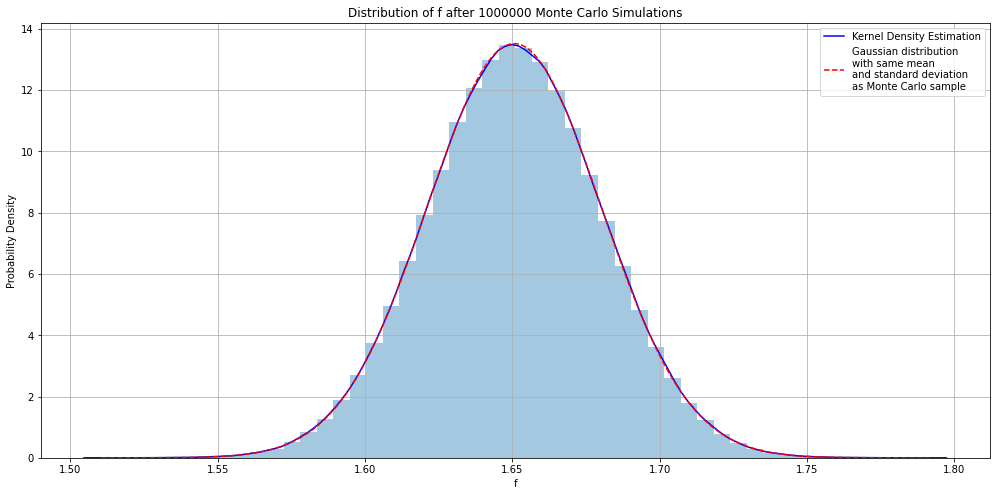

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt 
## Set up size of graphs
from pylab import rcParams
rcParams['figure.figsize'] = 17, 8
from uncertainty_class import uncert_prop

# Create an object just by using the two mantatory variables, func and x. By default, Delta Method is used.
unc_delta = uncert_prop(mean,x)

# Obtain SEM using .SEM() object
print('x = {:.4e} +/- {:.4e}'.format(mean(x),unc_delta.SEM()))
print('(SEM_real - SEM_delta_method)^2 = ', (SEM(x) - unc_delta.SEM())**2)

# In order to use Monte Carlo method, set method='Monte_Carlo'.
# Size of MC sample is also a parameter. The default is 1e4. Here it's set to 1e6.
unc_MC = uncert_prop(mean,x, method='Monte_Carlo', MC_sample_size=1e6)

print('x = {:.4e} +/- {:.4e}'.format(mean(x),unc_MC.SEM()))
print('(SEM_real - SEM_MC_method)^2 = ', (SEM(x) - unc_MC.SEM())**2)

# To Plot the distribution of f use .f_MC_dist_plot() object
unc_MC.f_MC_dist_plot()



For Delta method, gradient vector is computed numerically such as 

\begin{equation}
\dfrac{\partial f(x,y,z)}{\partial x} \approx \dfrac{f(x+h,y,z) - f(x,y,z)}{h}
\end{equation}

with $h=10^{-8}$ by default, but its parametrized via `grad_dx`.

In case where we don't deal with a sample of measurements of a variable but the SEM of input variables are given, we must construct the covariance matrix and then calculate the uncertainty propagation; such as the following example

Delta Method:
T = 7.0010e+02 +/- 1.8577e-03
Monte Carlo Method:
T = 7.0010e+02 +/- 1.8576e-03


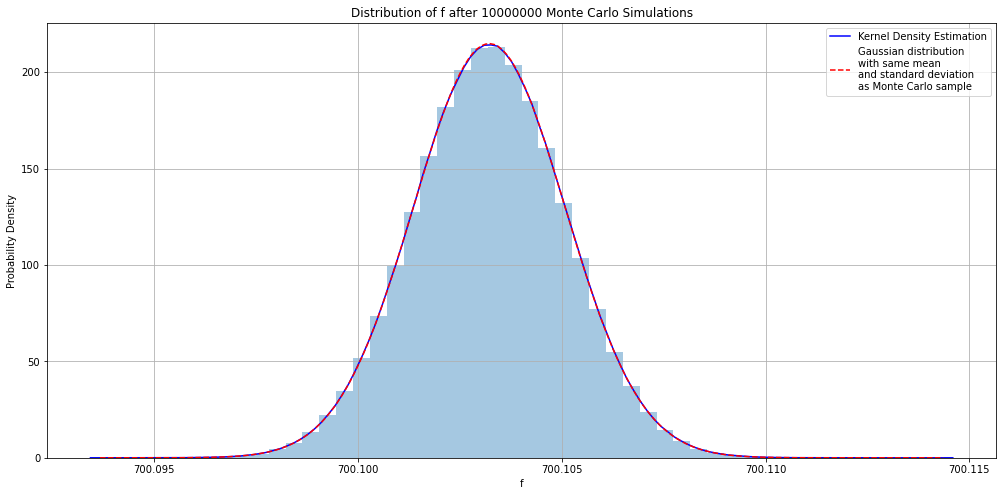

In [17]:
### Example from:
### https://www.intechopen.com/books/theory-and-applications-of-monte-carlo-simulations/
### monte-carlo-simulations-applied-to-uncertainty-in-measurement

def T(m,g,L):
    return m*g*L

m = 35.7653
m_SEM = 9.49e-5
g = 9.7874867 
g_SEM = 0.0000002
L = 1999.9955 *1e-3
L_SEM = 0.000004 *1e-3

x = [m,g,L]

# In this example, we construct the covariance matrix
cov_matrix = np.diagflat(np.square([m_SEM,g_SEM,L_SEM]))

# func must be in type func(x) where x is a vector. Otherwise a wrapper func is used. In this example, 
# lambda is used to unpack x.
unc_delta = uncert_prop(lambda x : T(*x),x,cov_matrix=cov_matrix)
unc_MC = uncert_prop(lambda x : T(*x),x,cov_matrix=cov_matrix, method='Monte_Carlo', MC_sample_size=1e7)

T_mean = T(*x)
print('Delta Method:')
print('T = {:.4e} +/- {:.4e}'.format(T_mean,unc_delta.SEM()))
print('Monte Carlo Method:')
print('T = {:.4e} +/- {:.4e}'.format(T_mean,unc_MC.SEM()))

# Plot distribution of func(x) using .f_MC_dist_plot() object
unc_MC.f_MC_dist_plot()

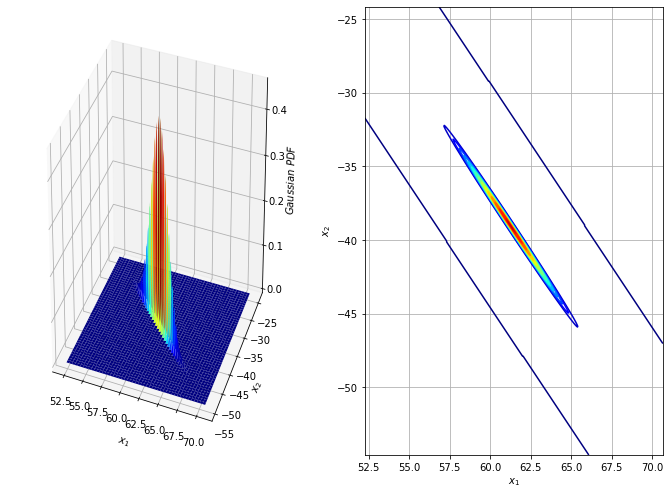

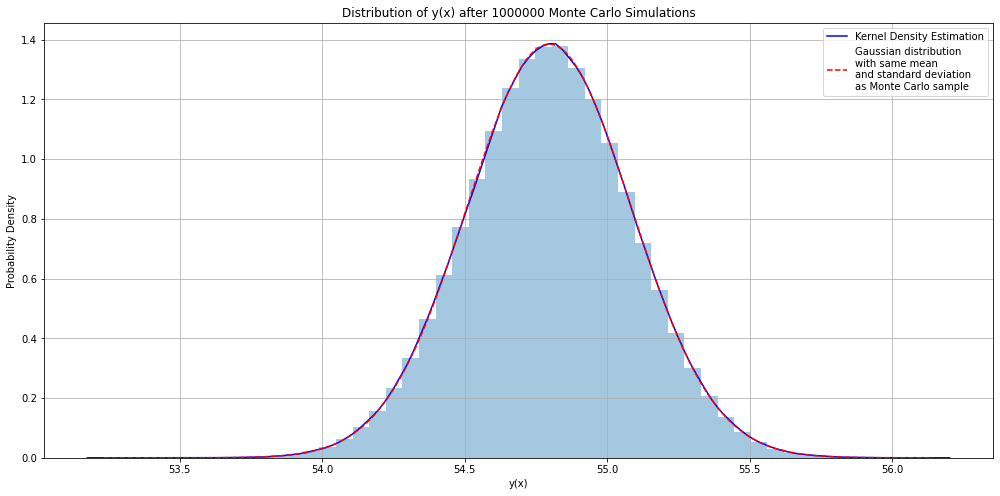

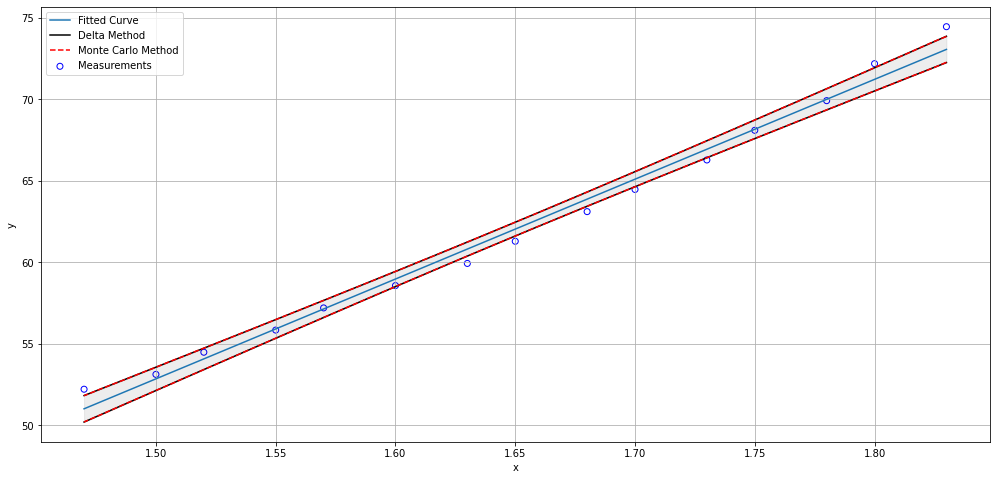

In [18]:
### Linear regression example from https://en.wikipedia.org/wiki/Simple_linear_regression

import random
from scipy.optimize import curve_fit

from pylab import rcParams
rcParams['figure.figsize'] = 17, 8


x = np.array([1.47 ,	1.50 ,	1.52 ,	1.55 ,	1.57 ,	1.60 ,	1.63,
              1.65 ,	1.68 ,	1.70 ,	1.73 ,	1.75 ,	1.78 ,	1.80, 	1.83])
y = np.array([52.21 ,53.12 ,	54.48 ,	55.84 ,	57.20 ,58.57, 59.93 ,
              61.29 ,	63.11 ,	64.47 ,	66.28 ,	68.10 ,	69.92 ,	72.19 	,74.46])

def model(x,a,b):
    return a*x + b

popt, pcov = curve_fit(model, x, y)

x_plt = np.linspace(max(x), min(x), 100)

unc_delta, unc_MC = [],[]
SEM,SEM_MC,lcb,lcb_MC,ucb,ucb_MC = (np.empty(len(x_plt)) for i in range(6))
for i,xi in enumerate(x_plt):
    unc_delta.append(uncert_prop(lambda p: model(xi,*p), popt,cov_matrix=pcov))
    unc_MC.append(uncert_prop(lambda p: model(xi,*p), popt,cov_matrix=pcov, method='Monte_Carlo'))
    SEM[i] = unc_delta[i].SEM()
    SEM_MC[i]= unc_MC[i].SEM()
    lcb[i],ucb[i] = unc_delta[i].confband(sample_size=len(x))
    lcb_MC[i],ucb_MC[i] = unc_MC[i].confband(sample_size=len(x))

x_rand = random.choice(x_plt)

x_rand_unc_MC =uncert_prop(lambda p : model(x_rand,*p),popt, cov_matrix=pcov,method='Monte_Carlo', MC_sample_size=1e6)

# Plot distribution of sampled x using .x_MC_dist_plot() object
x_rand_unc_MC.x_MC_dist_plot()

x_rand_unc_MC.f_MC_dist_plot(func_name='y(x)')

# Plot the results
plt.figure()
plt.scatter(x,y,facecolors='none', edgecolors='blue',label='Measurements')
plt.plot(x_plt,model(x_plt,*popt),label='Fitted Curve')
plt.plot(x_plt,ucb,'k-',label='Delta Method')
plt.plot(x_plt,lcb,'k-')
plt.plot(x_plt,ucb_MC,'r--',label='Monte Carlo Method')
plt.plot(x_plt,lcb_MC,'r--')
plt.fill_between(x_plt, ucb, lcb,color='black',alpha=0.07)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

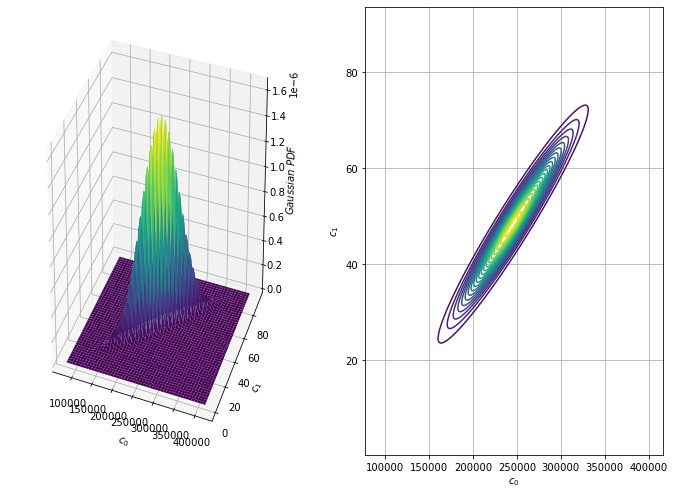

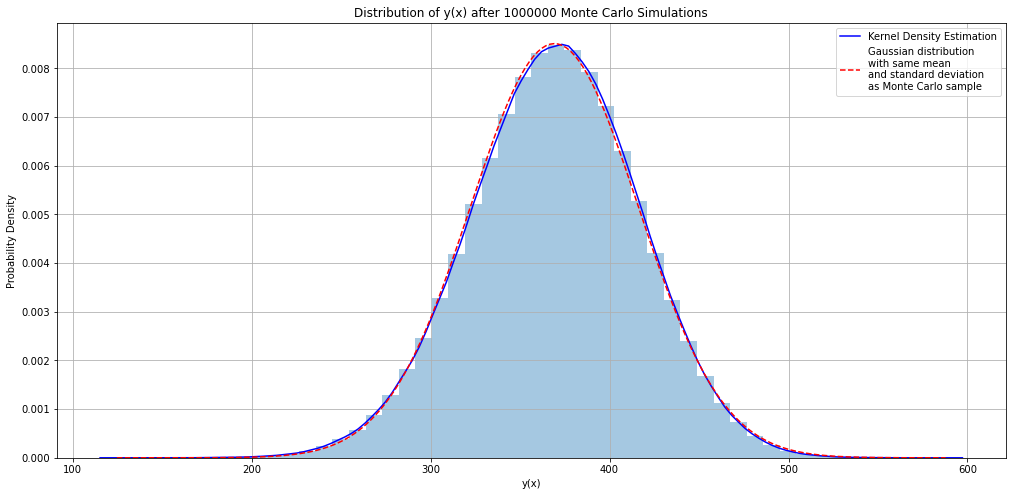

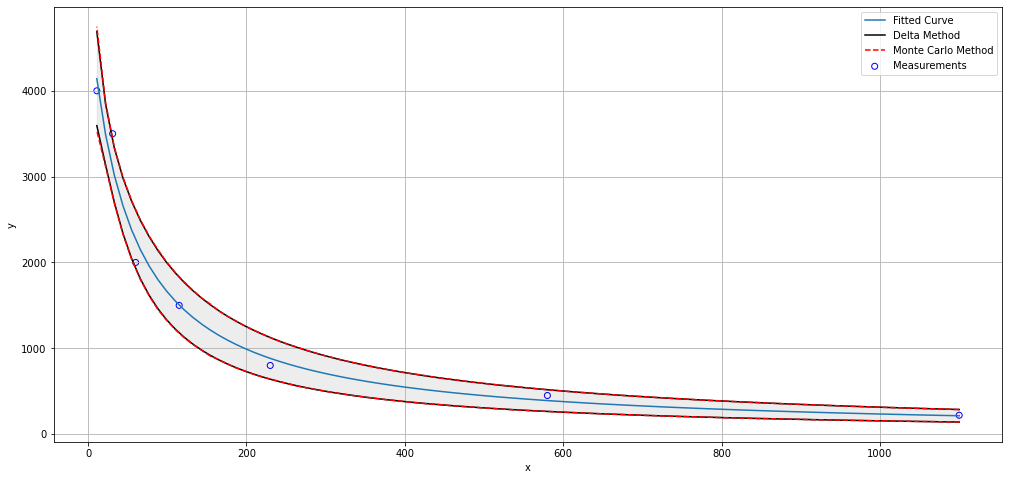

In [19]:
### Non linear regression example

y = np.array([4e3,3.5e3,2e3,1.5e3,8e2,4.5e2,2.2e2])
x = np.array([1.1e1,3.1e1,6e1,1.15e2,2.3e2,5.8e2,1.1e3])

def model(x,c0,c1):
    return c0/(x + c1)

popt, pcov = curve_fit(model,x,y,maxfev=1000000)

x_plt = np.linspace(max(x), min(x),100)

unc_delta, unc_MC = [],[]
SEM,SEM_MC,lcb,lcb_MC,ucb,ucb_MC = (np.empty(len(x_plt)) for i in range(6))
for i,xi in enumerate(x_plt):
    unc_delta.append(uncert_prop(lambda p: model(xi,*p), popt, cov_matrix=pcov))
    unc_MC.append(uncert_prop(lambda p: model(xi,*p), popt,cov_matrix=pcov, method='Monte_Carlo'))
    SEM[i] = unc_delta[i].SEM()
    SEM_MC[i] = unc_MC[i].SEM()
    lcb[i],ucb[i] = unc_delta[i].confband(sample_size=len(x))
    lcb_MC[i],ucb_MC[i] = unc_MC[i].confband(sample_size=len(x))

x_rand = random.choice(x_plt)

x_rand_unc_MC =uncert_prop(lambda p : model(x_rand,*p),popt, cov_matrix=pcov,method='Monte_Carlo', MC_sample_size=1e6)

x_rand_unc_MC.x_MC_dist_plot(contours=20,cmap='viridis',xlabel='$c_0$',ylabel='$c_1$')
x_rand_unc_MC.f_MC_dist_plot(func_name='y(x)')

# Plot the results
plt.figure()
plt.scatter(x,y,facecolors='none', edgecolors='blue',label='Measurements')
plt.plot(x_plt,model(x_plt,*popt),label='Fitted Curve')
plt.plot(x_plt,ucb,'k-',label='Delta Method')
plt.plot(x_plt,lcb,'k-')
plt.plot(x_plt,ucb_MC,'r--',label='Monte Carlo Method')
plt.plot(x_plt,lcb_MC,'r--')
plt.fill_between(x_plt, ucb, lcb,color='black',alpha=0.07)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

In the following example is illustrated the calculation of uncertainty of a non linear equation $y(c_0,c_1) $, where $c_0,c_1$ the parameters from the non-linear regression

\begin{equation}
y =  \dfrac{c_0 c_1 + c_0^2 - c_1^2}{c_0^3 + c_0 c_1^2}
\end{equation}

Delta Method:
y = 4.0707e-06 +/- 5.7490e-07
Monte Carlo Method:
y = 4.0707e-06 +/- 6.2842e-07


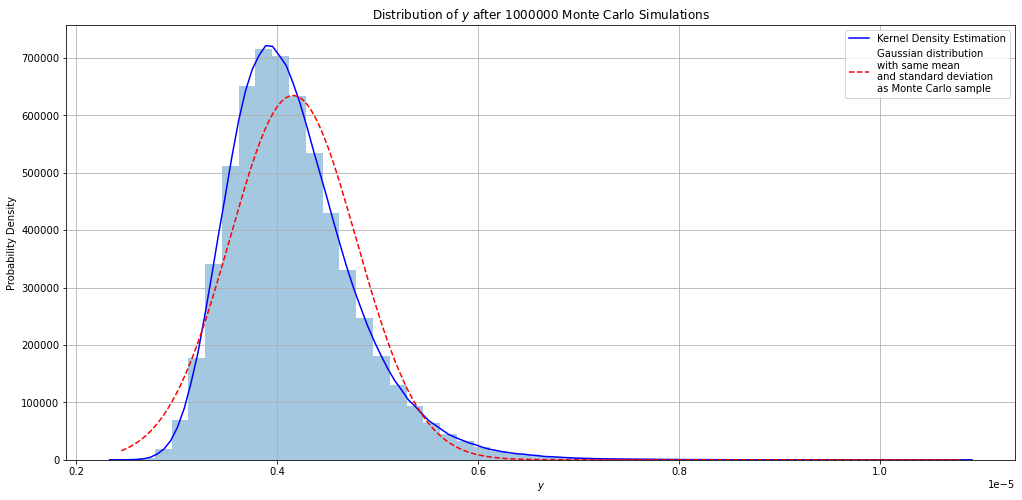

In [20]:
def y(c0,c1): return (c0*c1 + c0**2 - np.log(c1**2)) / (c0**3 + c0*c1**2)

res_delta = uncert_prop(lambda p : y(*p),popt,cov_matrix=pcov,grad_dx=1e-8)
res_MC = uncert_prop(lambda p : y(*p),popt,cov_matrix=pcov, method='Monte_Carlo', MC_sample_size=1e6)

print('Delta Method:')
print('y = {:.4e} +/- {:.4e}'.format(y(*popt),res_delta.SEM()))
print('Monte Carlo Method:')
print('y = {:.4e} +/- {:.4e}'.format(y(*popt),res_MC.SEM()))

res_MC.f_MC_dist_plot(func_name='$y$')

Here, because y is severely non linear, the distribution of y population is not normal so delta method can't provide robust results and MC method should be prefered. 
